In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score

In [ ]:
#importar los datos
from google.colab import files
uploaded = files.upload()

Saving Student Depression Dataset.csv to Student Depression Dataset (1).csv


In [ ]:
df = pd.read_csv('Student Depression Dataset.csv')
print(df.shape)
df.sample(5)

(27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
23400,117929,Male,28.0,Mumbai,Student,5.0,0.0,5.85,3.0,0.0,Less than 5 hours,Unhealthy,B.Ed,Yes,12.0,4.0,Yes,1
19271,97623,Female,20.0,Agra,Student,1.0,0.0,6.10,1.0,0.0,5-6 hours,Moderate,Class 12,No,7.0,1.0,Yes,0
2214,11272,Female,20.0,Ahmedabad,Student,5.0,0.0,9.49,2.0,0.0,Less than 5 hours,Unhealthy,Class 12,Yes,5.0,5.0,Yes,1
19982,101212,Male,24.0,Faridabad,Student,4.0,0.0,8.23,3.0,0.0,Less than 5 hours,Unhealthy,Class 12,Yes,8.0,4.0,Yes,1
7831,39319,Male,30.0,Surat,Student,3.0,0.0,6.29,5.0,0.0,5-6 hours,Healthy,B.Tech,No,12.0,2.0,Yes,0


In [ ]:
#quitamos la variable de id y City porque con criterio de experto podemos saber que no son relevantes
df2 = df.drop('id', axis=1)
df2 = df2.drop('City', axis=1)
df2.sample(5)

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
14127,Male,21.0,Student,2.0,0.0,9.86,2.0,0.0,5-6 hours,Moderate,MCA,No,12.0,5.0,No,1
24483,Female,33.0,Student,4.0,0.0,5.79,4.0,0.0,7-8 hours,Unhealthy,LLM,No,9.0,5.0,No,1
3222,Female,20.0,Student,3.0,0.0,5.27,3.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,2.0,5.0,Yes,1
7630,Male,27.0,Student,3.0,0.0,5.79,5.0,0.0,7-8 hours,Moderate,MA,No,12.0,3.0,Yes,0
10098,Female,18.0,Student,5.0,0.0,5.56,3.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,10.0,3.0,Yes,1


In [ ]:
#vemos los valores únicos de todas las variables
df2.nunique()

,0
Gender,2
Age,34
Profession,14
Academic Pressure,6
Work Pressure,3
CGPA,332
Study Satisfaction,6
Job Satisfaction,5
Sleep Duration,5
Dietary Habits,4


In [ ]:
#profession al ser categórica con muchos valores únicos lo cambiaremos a la variables student? donde 1 es que si y 0 es que no.
df2['Student']=df2['Profession'].apply(lambda x: 1 if x=='Student' else 0)
df2.sample(5)

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Student
6649,Male,25.0,Student,5.0,0.0,9.54,1.0,0.0,7-8 hours,Moderate,B.Ed,Yes,11.0,4.0,No,1,1
12778,Male,23.0,Student,5.0,0.0,6.84,1.0,0.0,7-8 hours,Moderate,BSc,No,4.0,3.0,Yes,1,1
7287,Male,25.0,Student,3.0,0.0,9.72,1.0,0.0,7-8 hours,Healthy,M.Pharm,Yes,12.0,2.0,Yes,1,1
27529,Female,34.0,Student,3.0,0.0,5.87,5.0,0.0,5-6 hours,Unhealthy,B.Pharm,Yes,10.0,5.0,No,0,1
22028,Female,25.0,Student,4.0,0.0,9.89,3.0,0.0,More than 8 hours,Moderate,B.Ed,Yes,10.0,5.0,Yes,1,1


In [ ]:
#convertimos el resto de las variables numéricas en categóricas numéricas
le=LabelEncoder()
df2['Gender_num'] = le.fit_transform(df2['Gender'])
df2['Sleep_duration'] = le.fit_transform(df2['Sleep Duration'])
df2['Dietary_habits'] = le.fit_transform(df2['Dietary Habits'])
df2['Suicidal_thoughts']= le.fit_transform(df2['Have you ever had suicidal thoughts ?'])
df2['Mental_illnes_history'] = le.fit_transform(df2['Family History of Mental Illness'])
df2['Depression_num'] = le.fit_transform(df2['Depression'])
df2.sample(5)

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,Financial Stress,Family History of Mental Illness,Depression,Student,Gender_num,Sleep_duration,Dietary_habits,Suicidal_thoughts,Mental_illnes_history,Depression_num
8034,Female,28.0,Student,3.0,0.0,5.51,5.0,0.0,7-8 hours,Moderate,...,1.0,Yes,0,1,0,1,1,0,1,0
15242,Male,28.0,Student,5.0,0.0,9.89,4.0,0.0,Less than 5 hours,Unhealthy,...,1.0,No,1,1,1,2,3,0,0,1
14159,Female,22.0,Student,1.0,0.0,5.80,4.0,0.0,More than 8 hours,Moderate,...,5.0,Yes,1,1,0,3,1,0,1,1
14153,Female,18.0,Student,3.0,0.0,8.53,4.0,0.0,Less than 5 hours,Moderate,...,5.0,No,1,1,0,2,1,1,0,1
6817,Female,24.0,Student,1.0,0.0,6.17,3.0,0.0,More than 8 hours,Healthy,...,5.0,Yes,0,1,0,3,0,1,1,0


In [ ]:
#quitamos todas las variables no numéricas, incluyendo degree ya que no nos podrá aportar información según nuestro criterio de experto
df_clean=df2.drop(['Gender', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Depression','Degree','Family History of Mental Illness'], axis=1)
df_clean.sample(5)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Student,Gender_num,Sleep_duration,Dietary_habits,Suicidal_thoughts,Mental_illnes_history,Depression_num
8890,28.0,5.0,0.0,9.72,2.0,0.0,0.0,1.0,1,0,2,0,1,1,1
8405,21.0,1.0,0.0,7.14,5.0,0.0,12.0,2.0,1,0,2,3,0,0,0
25305,22.0,1.0,0.0,9.39,1.0,0.0,10.0,5.0,1,1,2,3,1,1,1
18879,23.0,3.0,0.0,9.10,4.0,0.0,5.0,1.0,1,0,3,0,1,0,1
27457,21.0,5.0,0.0,8.64,2.0,0.0,5.0,5.0,1,1,1,3,1,0,1


In [ ]:
#revisamos si hay na›
df_clean.isna().sum()

,0
Age,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Work/Study Hours,0
Financial Stress,3
Student,0
Gender_num,0


In [ ]:
#quitamos los na
df_clean=df_clean.dropna()
df_clean.isna().sum()

,0
Age,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Work/Study Hours,0
Financial Stress,0
Student,0
Gender_num,0


In [ ]:
#vemos la base de datos final
df_clean.sample(5)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Student,Gender_num,Sleep_duration,Dietary_habits,Suicidal_thoughts,Mental_illnes_history,Depression_num
3416,19.0,5.0,0.0,7.88,2.0,0.0,7.0,3.0,1,1,2,1,1,0,1
22917,21.0,1.0,0.0,7.92,3.0,0.0,4.0,3.0,1,1,2,0,1,0,1
24109,24.0,1.0,0.0,9.84,1.0,0.0,7.0,5.0,1,0,1,3,0,1,0
16529,19.0,4.0,0.0,7.10,1.0,0.0,10.0,3.0,1,0,3,1,1,0,1
17373,31.0,4.0,0.0,8.04,2.0,0.0,10.0,5.0,1,0,2,3,0,1,1


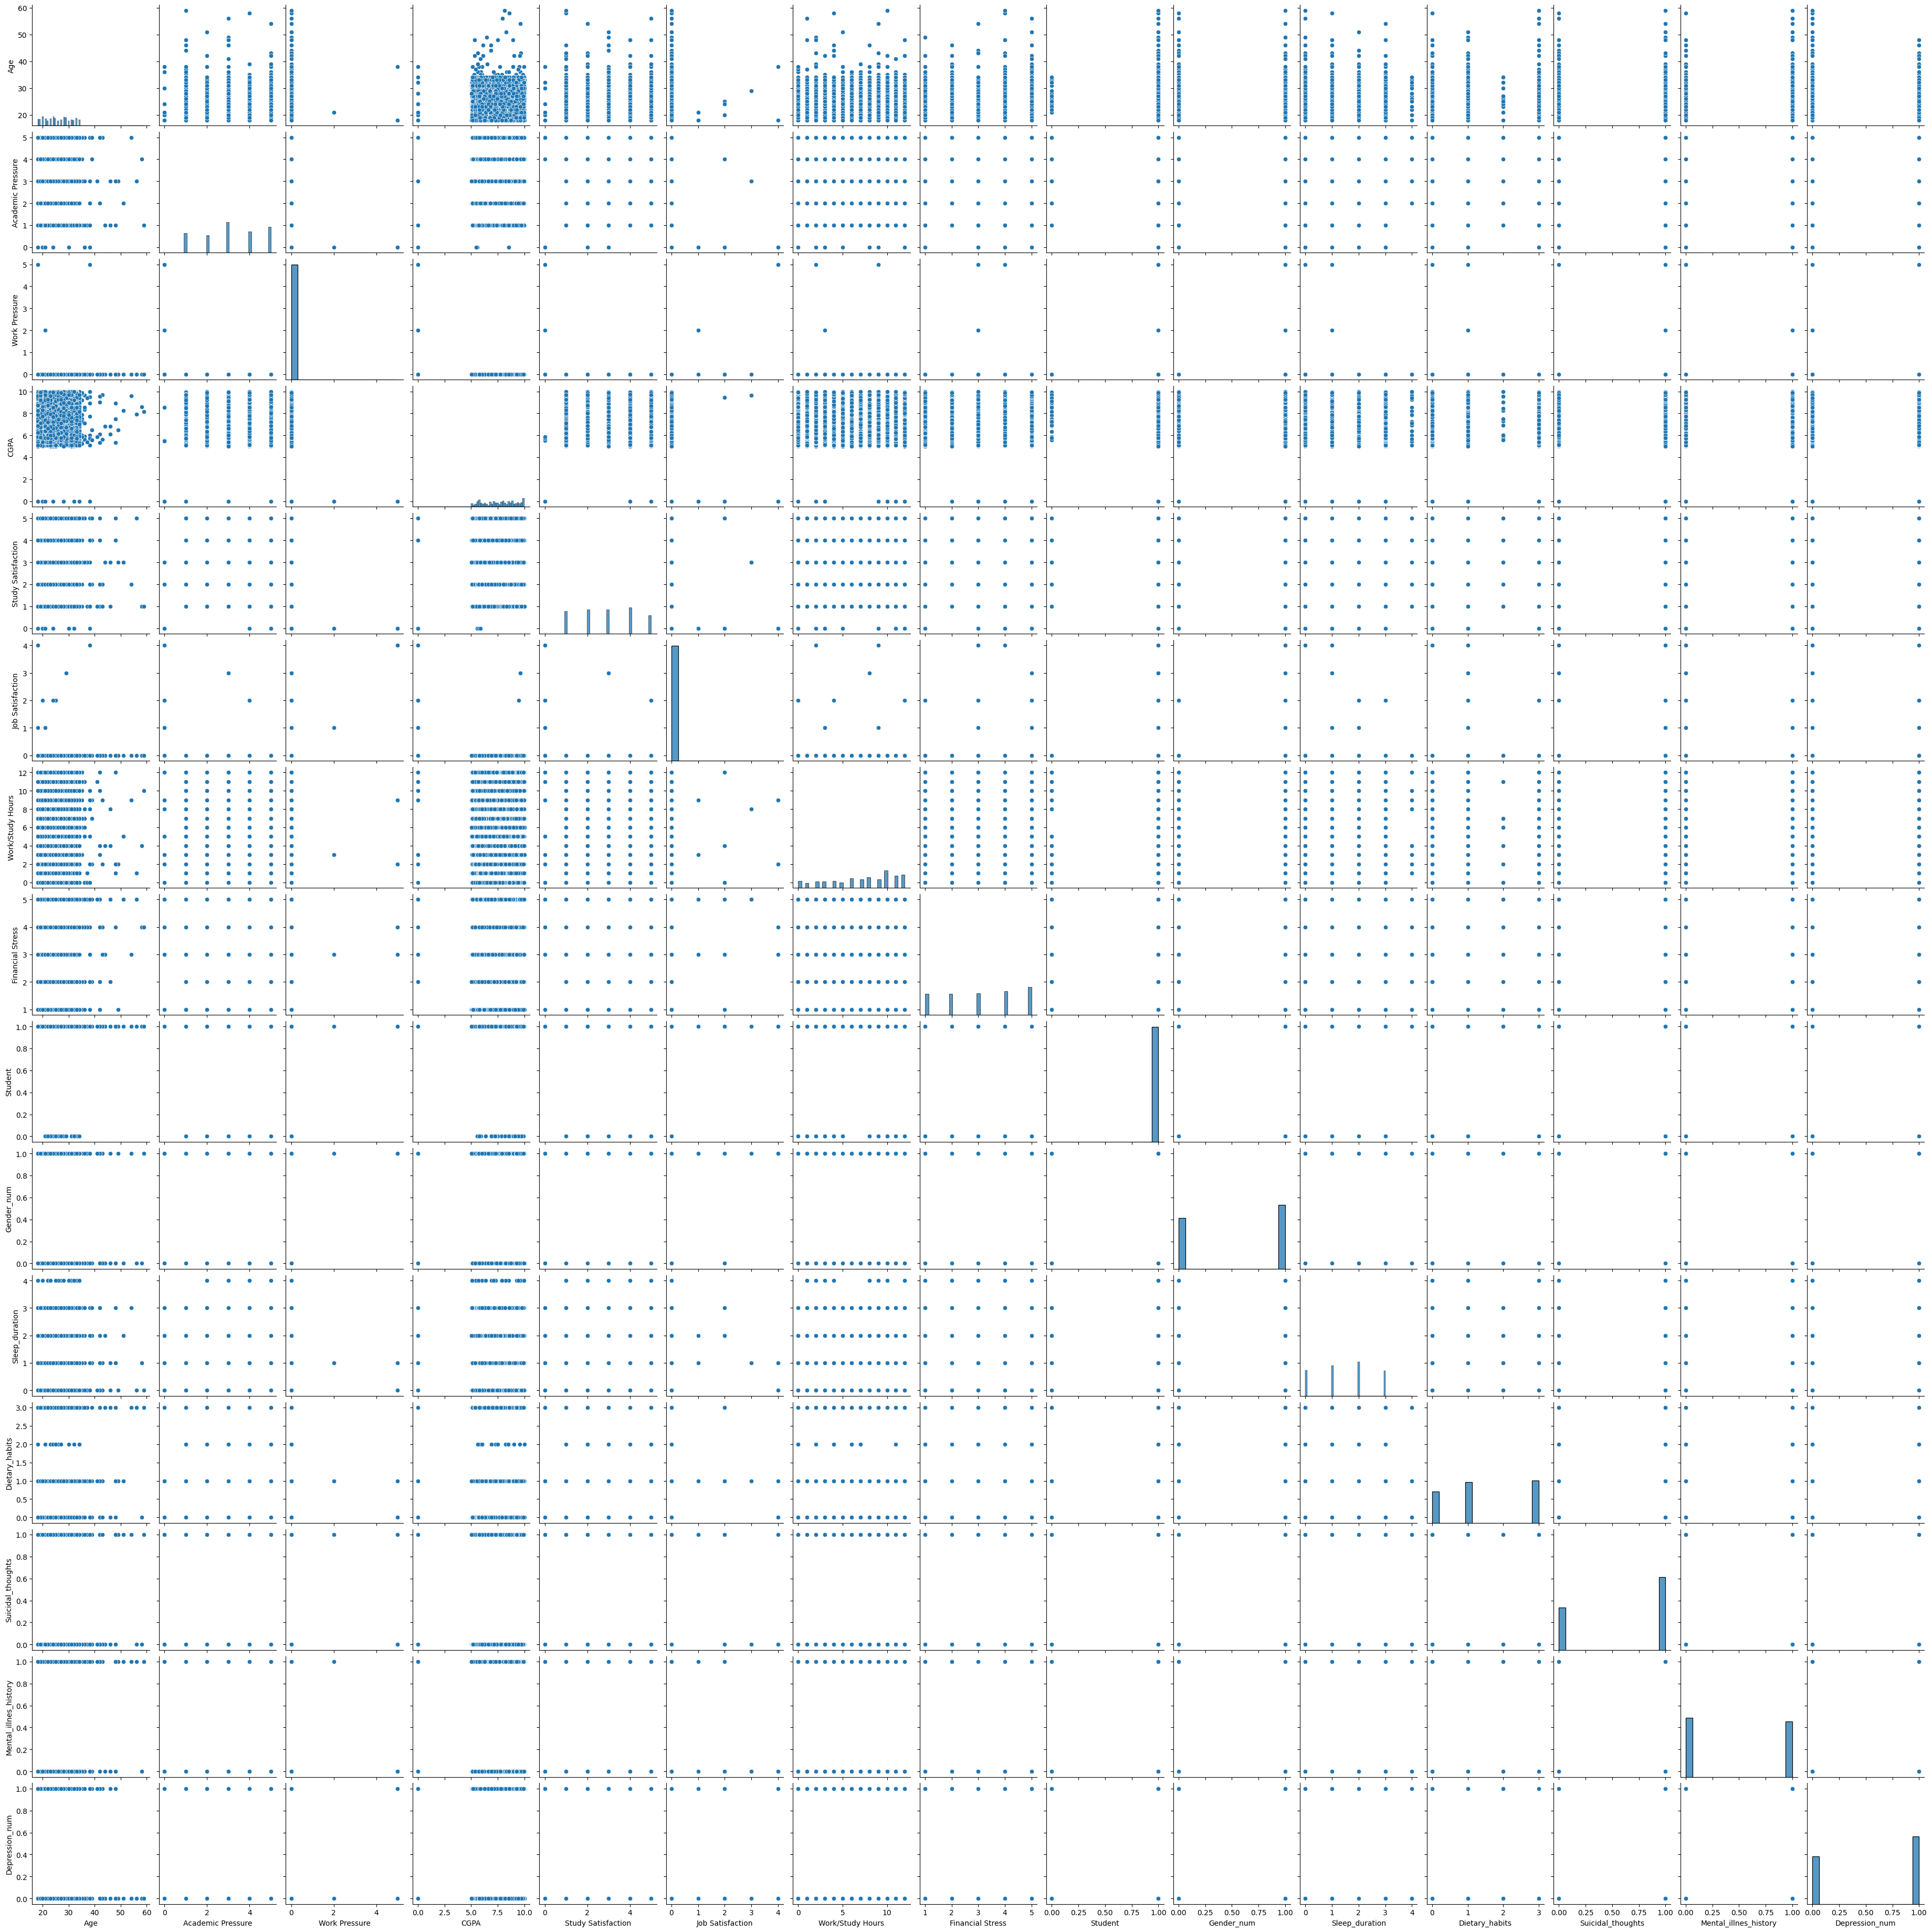

In [ ]:
#vemos la dispersión de las variables
sns.pairplot(df_clean)

In [ ]:
df_clean.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Student,Gender_num,Sleep_duration,Dietary_habits,Suicidal_thoughts,Mental_illnes_history,Depression_num
count,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000,27898.000000
mean,25.822174,3.141336,0.000430,7.656160,2.943974,0.000681,7.156570,3.139867,0.998889,0.557244,1.511506,1.465804,0.632877,0.483942,0.585526
std,4.905651,1.381462,0.043994,1.470708,1.361122,0.044397,3.707598,1.437347,0.033317,0.496721,1.063102,1.239674,0.482029,0.499751,0.492640
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,1.000000


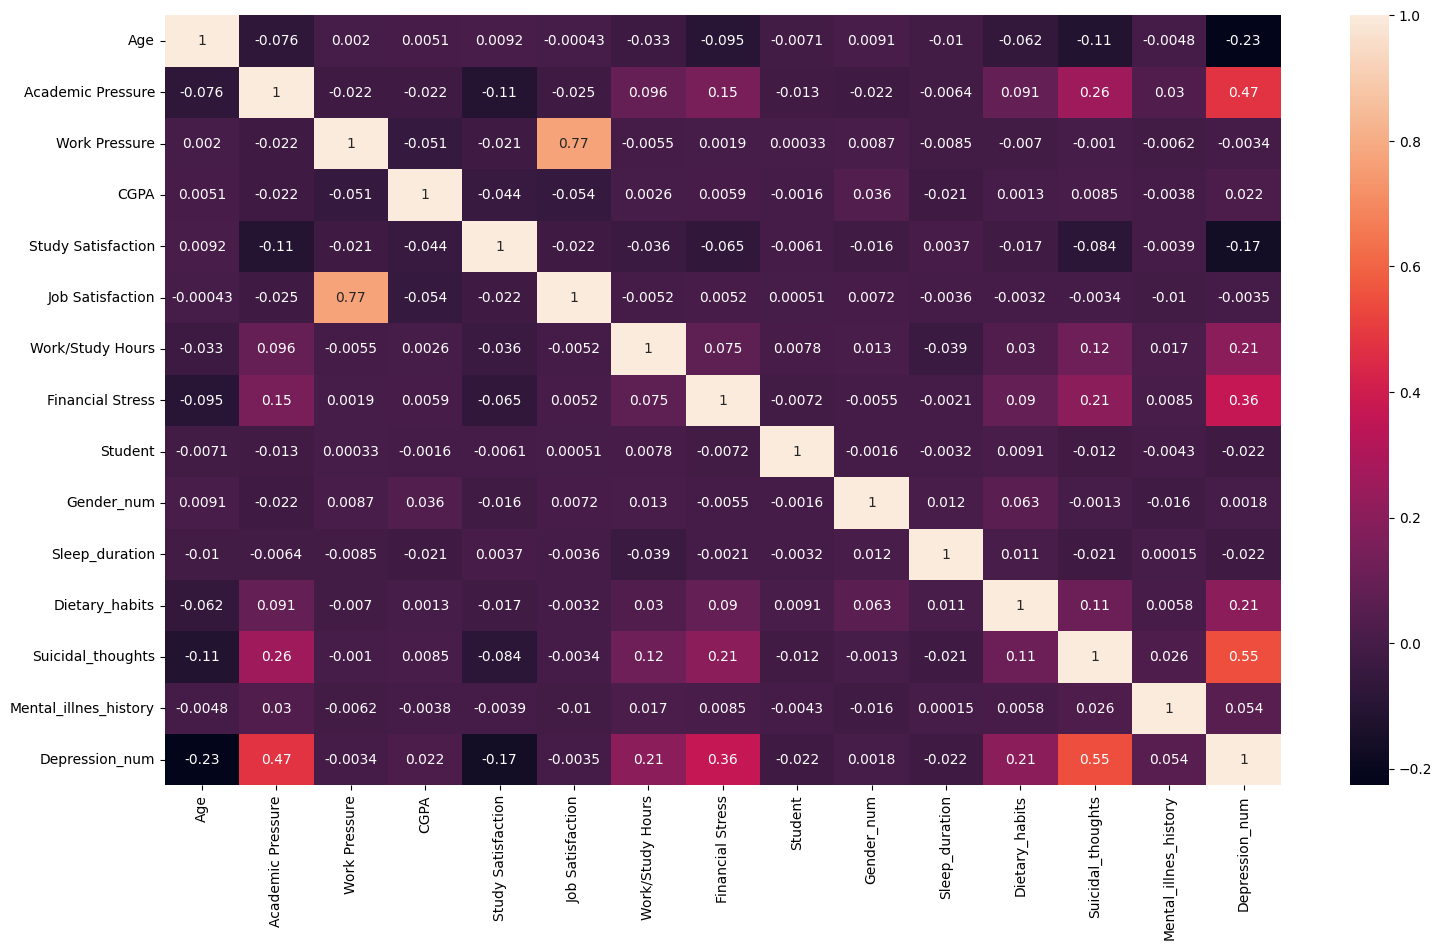

In [ ]:
#revisamos si hay correlación con la matriz de correlación
plt.figure(figsize=(18,10))
sns.heatmap(df_clean.corr(numeric_only=True),annot=True)
plt.show()

**Modelo de Regresión Logística**

**Determinar la significancia estadística** - Feature selection - Análisis Discriminante

In [ ]:
df_clean.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Student', 'Gender_num', 'Sleep_duration',
       'Dietary_habits', 'Suicidal_thoughts', 'Mental_illnes_history',
       'Depression_num'],
      dtype='object')

In [ ]:
#Importamos la función
import statsmodels.formula.api as smf

#Definir la fórmula
f = 'Depression_num ~ Q("Age") + Q("Academic Pressure") + Q("Work Pressure") + Q("CGPA") + Q("Study Satisfaction") + Q("Job Satisfaction") + Q("Work/Study Hours") + Q("Financial Stress") + Q("Student") + Q("Gender_num") + Q("Sleep_duration") + Q("Dietary_habits") + Q("Suicidal_thoughts") + Q("Mental_illnes_history")'
model_FS = smf.ols(formula=f, data=df_clean).fit()
model_FS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Depression_num   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2111.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:23:50   Log-Likelihood:                -9753.4
No. Observations:               27898   AIC:                         1.954e+04
Df Residuals:                   27883   BIC:                         1.966e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.1964      0.065      3.034      0.002       0.070       0.323
Q("Age")                      -0.0131      0.000    -30.984      0.000      -0.014      -0.012
Q("Academic Pressure")         0.1093      0.002     69.826      0.000       0.106       0.112
Q("Work Pressure")             0.0215      0.073      0.293      0.770      -0.122       0.165
Q("CGPA")                      0.0072      0.001      5.123      0.000       0.004       0.010
Q("Study Satisfaction")       -0.0294      0.002    -19.278      0.000      -0.032      -0.026
Q("Job Satisfaction")          0.0372      0.073      0.512      0.608      -0.105       0.180
Q("Work/Study Hours")          0.0142      0.001     25.347      0.000       0.013       0.015
Q("Financial Stress")          0.0695      0.001     46.960      0.000       0.067       0.072
Q("Student")                  -0.2167      0.062     -3.510      0.000      -0.338      -0.096
Q("Gender_num")                0.0018      0.004      0.436      0.663      -0.006       0.010
Q("Sleep_duration")           -0.0045      0.002     -2.302      0.021      -0.008      -0.001
Q("Dietary_habits")            0.0419      0.002     24.950      0.000       0.039       0.045
Q("Suicidal_thoughts")         0.3843      0.005     84.578      0.000       0.375       0.393
Q("Mental_illnes_history")     0.0290      0.004      7.037      0.000       0.021       0.037
==============================================================================
Omnibus:                      230.322   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.888
Skew:                          -0.223   Prob(JB):                     5.99e-52
Kurtosis:                       3.057   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Veamos el p-value preciso
model_FS.pvalues.sort_values(ascending=True)

,0
"Q(""Academic Pressure"")",0.000000e+00
"Q(""Financial Stress"")",0.000000e+00
"Q(""Suicidal_thoughts"")",0.000000e+00
"Q(""Age"")",2.904854e-207
"Q(""Work/Study Hours"")",3.754980e-140
"Q(""Dietary_habits"")",6.651510e-136
"Q(""Study Satisfaction"")",2.844635e-82
"Q(""Mental_illnes_history"")",2.016144e-12
"Q(""CGPA"")",3.030271e-07
"Q(""Student"")",4.483585e-04


Utilizamos las variables de "Academic Pressure" y "Financial Stress" ya que son las dos variables más significativas sin multicolinealidad según statsmodels.

In [ ]:
#Definimos los imputs y outputs del modelo
X = df_clean[['Academic Pressure','Financial Stress']]
y = df_clean['Depression_num']
print(X.shape)
print(y.shape)

(27898, 2)
(27898,)


In [ ]:
#Dividimos los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                   stratify=y) #para que se conserve el balance o desbalance
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22318, 2), (5580, 2), (22318,), (5580,))

In [ ]:
#Verificar que se conserva el balance de clases
y_train.value_counts()

,count
Depression_num,
1,13068
0,9250


In [ ]:
#Definimos el modelo
modelo1 = LogisticRegression(random_state=42)

#Entrenamos el modelo
modelo1.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
#Validamos con los datos de test
y_pred_test = modelo1.predict(x_test)
print('y_pred_test = ', y_pred_test[0:5])

#Comparamos cn los datos reales
print('y_test = \n', y_test.head())

y_pred_test =  [1 1 0 0 1]
y_test = 
 7017     0
7548     1
2051     0
4436     1
26281    1
Name: Depression_num, dtype: int64


In [ ]:
#Determinar las probabilidades
y_pred_proba = modelo1.predict_proba(x_test)
y_pred_proba[0:5]

array([[0.3492283 , 0.6507717 ],
       [0.3492283 , 0.6507717 ],
       [0.92719071, 0.07280929],
       [0.70671485, 0.29328515],
       [0.12427907, 0.87572093]])

In [ ]:
print('Accuracy_train = ', modelo1.score(x_train, y_train))
print('Accuracy_test = ', modelo1.score(x_test, y_test))
print('Diferencia = ', np.abs(modelo1.score(x_train, y_train) - modelo1.score(x_test, y_test))*100)

Accuracy_train =  0.7606416345550676
Accuracy_test =  0.7593189964157706
Diferencia =  0.13226381392970055


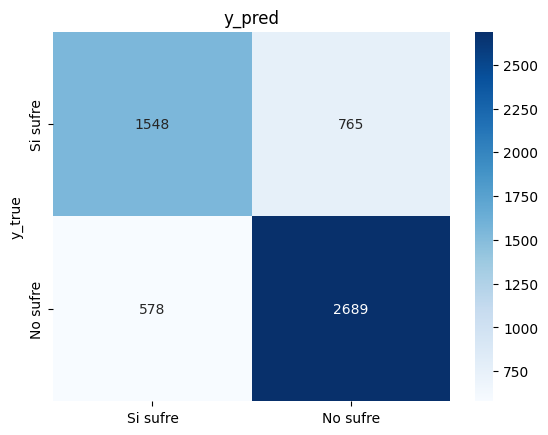

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
#Matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Si sufre','No sufre'], yticklabels=['Si sufre','No sufre'], fmt='g')
plt.ylabel('y_true')
plt.title('y_pred')
plt.show()

Con esta matriz de confusión, podemos ver que el modelo comete varios errores, vamos a ver que tanto es explicado

In [ ]:
#Importar la librería
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
#Setosa = 0
#Versicolor = 1
#Virginica = 2
target_names = ['Si sufre', 'No sufre']
print(classification_report(y_test, y_pred_test, target_names=target_names))
print('G-mean = ', geometric_mean_score(y_test, y_pred_test))
#G-mean = sqrt(recall0*recall1*recall2)

              precision    recall  f1-score   support

    Si sufre       0.73      0.67      0.70      2313
    No sufre       0.78      0.82      0.80      3267

    accuracy                           0.76      5580
   macro avg       0.75      0.75      0.75      5580
weighted avg       0.76      0.76      0.76      5580

G-mean =  0.7421958055788829


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression Boundary')

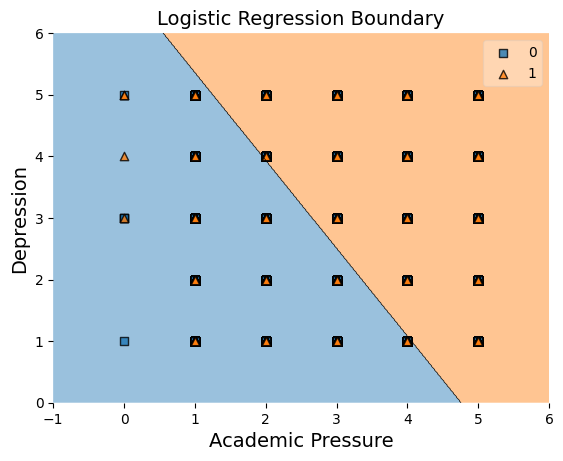

In [ ]:
from mlxtend.plotting import plot_decision_regions

#Transformar las variables a vectores
X_p = np.array(X)
y_p = np.array(y)

#Generamos la región
plot_decision_regions(X_p, y_p, clf=modelo1, legend=1)
plt.xlabel('Academic Pressure', size=14)
plt.ylabel('Depression', size=14)
plt.title('Logistic Regression Boundary', size=14)

Se puede ver que no se hace una clasificación adecuada de muchos de los datos, por lo que intentaremos con otro modelo.

In [ ]:
X.head()

,Academic Pressure,Financial Stress
0,5.0,1.0
1,2.0,2.0
2,3.0,1.0
3,3.0,5.0
4,4.0,1.0


In [ ]:
#Forma 1
modelo1.predict([[5,1], [2,1], [5,5]]) #0=No sufre, 1=Si sufre

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 1])

In [ ]:
#Forma 2
x_new = pd.DataFrame({'Academic Pressure': [5,1,2],
                     'Financial Stress': [2,1,5]})
x_new

,Academic Pressure,Financial Stress
0,5,2
1,1,1
2,2,5


In [ ]:
y_pred_new = modelo1.predict(x_new)
y_pred_new

array([1, 0, 1])

In [ ]:
#Calcular la probabilidad
y_pred_new_proba = modelo1.predict_proba(x_new)
y_pred_new_proba

array([[0.20279198, 0.79720802],
       [0.92719071, 0.07280929],
       [0.3492283 , 0.6507717 ]])

**Modelo de Random Forest Classifier usando solamente las dos variables más significativas**

In [ ]:
x=df_clean.drop('Depression_num', axis=1)
y=df_clean['Depression_num']

In [ ]:
#Definimos el modelo
model_fi = RandomForestClassifier(random_state=42)
#Entrenamos el modelo by default
model_fi.fit(x,y)

RandomForestClassifier(random_state=42)

In [ ]:
#Explicacion de la variable dependiente en funcion de todas las independientes
model_fi.score(x,y)

1.0

In [ ]:
fi=pd.DataFrame({"Feature": list(x.columns),"Importance": model_fi.feature_importances_}).sort_values("Importance",ascending=False)
fi

,Feature,Importance
12,Suicidal_thoughts,0.220142
1,Academic Pressure,0.172497
3,CGPA,0.124528
0,Age,0.110353
7,Financial Stress,0.104289
6,Work/Study Hours,0.090693
4,Study Satisfaction,0.054188
10,Sleep_duration,0.043929
11,Dietary_habits,0.041245
9,Gender_num,0.019884


In [ ]:
fi.set_index("Feature", inplace=True)
fi

,Importance
Feature,
Suicidal_thoughts,0.220142
Academic Pressure,0.172497
CGPA,0.124528
Age,0.110353
Financial Stress,0.104289
Work/Study Hours,0.090693
Study Satisfaction,0.054188
Sleep_duration,0.043929
Dietary_habits,0.041245


In [ ]:
suma_acum= fi.cumsum()
suma_acum

,Importance
Feature,
Suicidal_thoughts,0.220142
Academic Pressure,0.392639
CGPA,0.517167
Age,0.627519
Financial Stress,0.731809
Work/Study Hours,0.822501
Study Satisfaction,0.876689
Sleep_duration,0.920618
Dietary_habits,0.961863


Se escogen las variables de Suicidal_thoughts y Academic Pressure, solamente explica hasta el 39.26% de su feature importance, sin embargo, por ahora probaremos el modelo así.

In [ ]:
#seleccionar las variables
x=df_clean[['Suicidal_thoughts','Academic Pressure']]
y=df_clean['Depression_num']
print(x.shape)
print(y.shape)

(27898, 2)
(27898,)


In [ ]:
#Dividimos los datos en train y test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42,
                                                 stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22318, 2), (5580, 2), (22318,), (5580,))

In [ ]:
#Entrenamos el modelo primero by default (esto porque es probable que asi sea suficiente)
#Definimos el modelo
model2 = RandomForestClassifier(random_state=42)
#Entrenamos el modelo
model2.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Validamos con los datos de test
y_pred_test = model2.predict(x_test)
print("y_pred_test =", y_pred_test[0:5])

#comparamos con los datos reales
print("y_test = \n", y_test.head())

y_pred_test = [1 1 0 1 1]
y_test = 
 7017     0
7548     1
2051     0
4436     1
26281    1
Name: Depression_num, dtype: int64


In [ ]:
print("Acurracy_train =", model2.score(x_train, y_train))
print("Acurracy_test =", model2.score(x_test, y_test))
print("Diferencia =", np.abs(model2.score(x_train, y_train) - model2.score(x_test, y_test))*100)

Acurracy_train = 0.8049556411864862
Acurracy_test = 0.8089605734767025
Diferencia = 0.40049322902162565


El modelo no tiene overfitting.

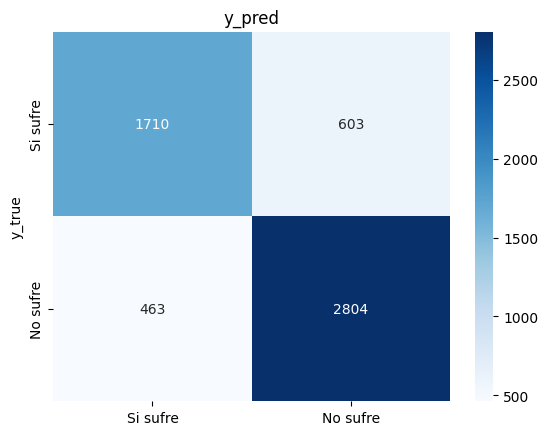

[[1710  603]
 [ 463 2804]]


In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
#Matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Si sufre','No sufre'], yticklabels=['Si sufre','No sufre'],fmt='g')
plt.ylabel('y_true')
plt.title('y_pred')
plt.show()

print(cm)

In [ ]:
#Importar la libreria
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
target_names = ["Si sufre",'No sufre']
print(classification_report(y_test, y_pred_test, target_names=target_names))
print("G-mean = ", geometric_mean_score(y_test, y_pred_test))

              precision    recall  f1-score   support

    Si sufre       0.79      0.74      0.76      2313
    No sufre       0.82      0.86      0.84      3267

    accuracy                           0.81      5580
   macro avg       0.80      0.80      0.80      5580
weighted avg       0.81      0.81      0.81      5580

G-mean =  0.7965713389622691


Explica el 79.65% de la variable dependiente, que sigue sin superar el 80% deseado para decir que es un buen modelo, pero se queda cerca. Probaremos el modelo optimizado.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression Boundary')

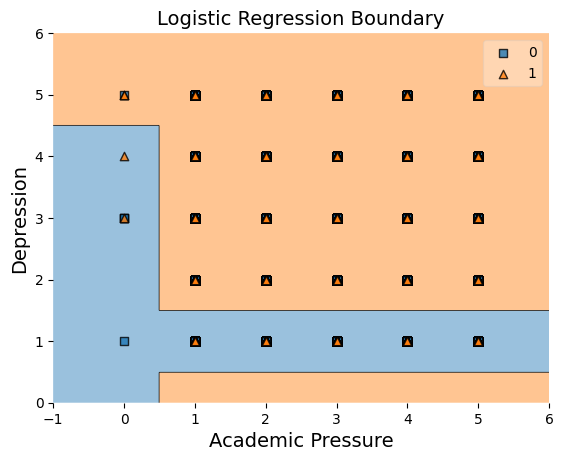

In [ ]:
from mlxtend.plotting import plot_decision_regions

#Transformar las variables a vectores
X_p = np.array(X)
y_p = np.array(y)

#Generamos la región
plot_decision_regions(X_p, y_p, clf=model2, legend=1)
plt.xlabel('Academic Pressure', size=14)
plt.ylabel('Depression', size=14)
plt.title('Logistic Regression Boundary', size=14)

Podemos ver que es un buen modelo sin embargo no termina ser lo suficientemente bueno, por lo que intentaremos con otro modelo.

In [ ]:
#Forma 1
model2.predict([[1,5], [0,2], [1,4]]) #0=Female, 1=Male

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1])

In [ ]:
#Forma 2
x_new = pd.DataFrame({'Suicidal_thoughts': [1,0,1],
                     'Academic Pressure': [5,2,4]})
x_new

,Suicidal_thoughts,Academic Pressure
0,1,5
1,0,2
2,1,4


In [ ]:
y_pred_new = model2.predict(x_new)
y_pred_new

array([1, 0, 1])

In [ ]:
#Calcular la probabilidad
y_pred_new_proba = model2.predict_proba(x_new)
y_pred_new_proba

array([[0.05570928, 0.94429072],
       [0.88289742, 0.11710258],
       [0.11948843, 0.88051157]])

**Modelo optimizado de Random Forest Classifier con dos variables**

In [ ]:
#Definir el rango de valores a utilizar

param_range = {'n_estimators': range(50,1050,50),
               'criterion': ['gini','entropy','log_loss'],
               'max_depth': range(1,16,1),
               'min_samples_split': range(2,16,1),
               'min_samples_leaf': range(1,16,1),
              'max_features': ['auto', 'sqrt', 'log2']}

#imprimamos los valores a optimizar
print(list(param_range['n_estimators']))
print(list(param_range['criterion']))
print(list(param_range['max_depth']))
print(list(param_range['min_samples_split']))
print(list(param_range['min_samples_leaf']))
print(list(param_range['max_features']))

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
['gini', 'entropy', 'log_loss']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
['auto', 'sqrt', 'log2']


In [ ]:
#Definir el g-mean como métrica genérica para optimizar el modelo
from sklearn.metrics import make_scorer
#Generamos al gmean como métrica genérica
g_mean_score = make_scorer(geometric_mean_score)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Definir el optimizador
csearch = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                             param_range,
                             cv=5, #Divide los datos en grupos de entrenamiento
                             n_jobs=-1, #Usar todos los procesadores del pc
                             verbose=3, #Ver los resultados detras del optimizador (como ver 3 resultados)
                             n_iter=20,
                            scoring=g_mean_score)
#Optimizamos el modelo
csearch.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 16),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 16),
                                        'min_samples_split': range(2, 16),
                                        'n_estimators': range(50, 1050, 50)},
                   scoring=make_scorer(geometric_mean_score, response_method='predict'),
                   verbose=3)

In [ ]:
#Veamos los resultados
print('Mean g_mean = ', csearch.best_score_)
print('Best Model = ', csearch.best_estimator_)
print('Best Params = ', csearch.best_params_)

Mean g_mean =  0.7912020691665924
Best Model =  RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=13, min_samples_split=4,
                       n_estimators=350, random_state=42)
Best Params =  {'n_estimators': 350, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
#Definimos el modelo óptimo
model3 = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=13,
                       n_estimators=300, random_state=42)
#Entrenar el modelo
model3.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=13,
                       n_estimators=300, random_state=42)

In [ ]:
#Validamos con los datos de test
y_pred_test2 = model3.predict(x_test)
print('y_pred_test = ', y_pred_test2[0:5])

#Comparamos cn los datos reales
print('y_test = \n', y_test.head())

y_pred_test =  [1 1 0 1 1]
y_test = 
 7017     0
7548     1
2051     0
4436     1
26281    1
Name: Depression_num, dtype: int64


In [ ]:
#Validamos con los datos de test
y_pred_test2 = model3.predict(x_test)
print('y_pred_test = ', y_pred_test2[0:5])

#Comparamos cn los datos reales
print('y_test = \n', y_test.head())

y_pred_test =  [1 1 0 1 1]
y_test = 
 7017     0
7548     1
2051     0
4436     1
26281    1
Name: Depression_num, dtype: int64


In [ ]:
print('Accuracy_train = ', model3.score(x_train, y_train))
print('Accuracy_test = ', model3.score(x_test, y_test))
print('Diferencia = ', np.abs(model3.score(x_train, y_train) - model3.score(x_test, y_test))*100)

Accuracy_train =  0.8049108343041491
Accuracy_test =  0.8087813620071684
Diferencia =  0.3870527703019322


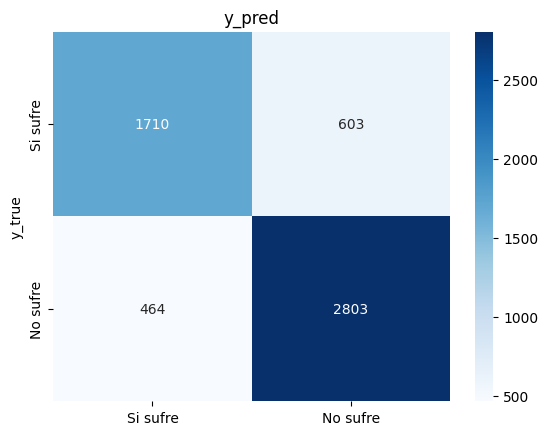

[[1710  603]
 [ 464 2803]]


In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test2)
#Matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Si sufre','No sufre'], yticklabels=['Si sufre','No sufre'],fmt='g')
plt.ylabel('y_true')
plt.title('y_pred')
plt.show()

print(cm)

In [ ]:
#Importar la librería
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score

target_names = ['Si sufre', 'No Sufre']
print(classification_report(y_test, y_pred_test2, target_names=target_names))
print('G-mean = ', geometric_mean_score(y_test, y_pred_test2))

              precision    recall  f1-score   support

    Si sufre       0.79      0.74      0.76      2313
    No Sufre       0.82      0.86      0.84      3267

    accuracy                           0.81      5580
   macro avg       0.80      0.80      0.80      5580
weighted avg       0.81      0.81      0.81      5580

G-mean =  0.796429284330919


Como era de esperarse, el gmean no subió y el overfitting bajó, pero quedó tan bajo que podríamos decir que se está perdiendo información, por lo que probaremos con usar la suficiente cantidad de variables que expliquen el 80% del FI.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression Boundary')

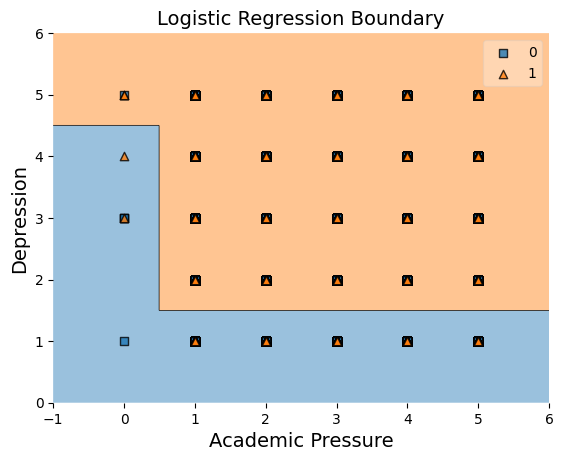

In [ ]:
from mlxtend.plotting import plot_decision_regions

#Transformar las variables a vectores
X_p = np.array(X)
y_p = np.array(y)

#Generamos la región
plot_decision_regions(X_p, y_p, clf=model3, legend=1)
plt.xlabel('Academic Pressure', size=14)
plt.ylabel('Depression', size=14)
plt.title('Logistic Regression Boundary', size=14)

Podemos ver un buen modelo, pero aun no es lo suficientemente bueno para decir que es un buen modelo.

In [ ]:
X.head()

,Academic Pressure,Financial Stress
0,5.0,1.0
1,2.0,2.0
2,3.0,1.0
3,3.0,5.0
4,4.0,1.0


In [ ]:
#Forma 1
model3.predict([[2,1], [3,3], [5,5]]) #0=no sufre, 1=si sufre

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1])

In [ ]:
#Forma 2
x_new = pd.DataFrame({'Suicidal_thoughts': [2,3,5],
                     'Academic Pressure': [1,3,5]})
x_new

,Suicidal_thoughts,Academic Pressure
0,2,1
1,3,3
2,5,5


In [ ]:
y_pred_new = model3.predict(x_new)
y_pred_new #0=no sufre, 1=si sufre

array([0, 1, 1])

In [ ]:
#Calcular la probabilidad
y_pred_new_proba = model3.predict_proba(x_new)
y_pred_new_proba

array([[0.6283651 , 0.3716349 ],
       [0.19419127, 0.80580873],
       [0.05576552, 0.94423448]])

**Modelo de Random Forest Classifier**

In [ ]:
x=df_clean.drop('Depression_num', axis=1)
y=df_clean['Depression_num']

In [ ]:
#Definimos el modelo
model_fi = RandomForestClassifier(random_state=42)
#Entrenamos el modelo by default
model_fi.fit(x,y)

RandomForestClassifier(random_state=42)

In [ ]:
#Explicacion de la variable dependiente en funcion de todas las independientes
model_fi.score(x,y)

1.0

In [ ]:
fi=pd.DataFrame({"Feature": list(x.columns),"Importance": model_fi.feature_importances_}).sort_values("Importance",ascending=False)
fi

,Feature,Importance
12,Suicidal_thoughts,0.220142
1,Academic Pressure,0.172497
3,CGPA,0.124528
0,Age,0.110353
7,Financial Stress,0.104289
6,Work/Study Hours,0.090693
4,Study Satisfaction,0.054188
10,Sleep_duration,0.043929
11,Dietary_habits,0.041245
9,Gender_num,0.019884


In [ ]:
fi.set_index("Feature", inplace=True)
fi

,Importance
Feature,
Suicidal_thoughts,0.220142
Academic Pressure,0.172497
CGPA,0.124528
Age,0.110353
Financial Stress,0.104289
Work/Study Hours,0.090693
Study Satisfaction,0.054188
Sleep_duration,0.043929
Dietary_habits,0.041245


In [ ]:
suma_acum= fi.cumsum()
suma_acum

,Importance
Feature,
Suicidal_thoughts,0.220142
Academic Pressure,0.392639
CGPA,0.517167
Age,0.627519
Financial Stress,0.731809
Work/Study Hours,0.822501
Study Satisfaction,0.876689
Sleep_duration,0.920618
Dietary_habits,0.961863


In [ ]:
#seleccionar las variables
x=df_clean[['Suicidal_thoughts','Academic Pressure', "CGPA", "Age","Financial Stress", "Work/Study Hours"]]
y=df_clean['Depression_num']
print(x.shape)
print(y.shape)

(27898, 6)
(27898,)


In [ ]:
#Dividimos los datos en train y test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42,
                                                 stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22318, 6), (5580, 6), (22318,), (5580,))

In [ ]:
#Entrenamos el modelo primero by default (esto porque es probable que asi sea suficiente)
#Definimos el modelo
model4 = RandomForestClassifier(random_state=42)
#Entrenamos el modelo
model4.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Validamos con los datos de test
y_pred_test = model4.predict(x_test)
print("y_pred_test =", y_pred_test[0:5])

#comparamos con los datos reales
print("y_test = \n", y_test.head())

y_pred_test = [1 1 0 0 1]
y_test = 
 7017     0
7548     1
2051     0
4436     1
26281    1
Name: Depression_num, dtype: int64


In [ ]:
print("Acurracy_train =", model4.score(x_train, y_train))
print("Acurracy_test =", model4.score(x_test, y_test))
print("Diferencia =", np.abs(model4.score(x_train, y_train) - model4.score(x_test, y_test))*100)

Acurracy_train = 0.9983869522358634
Acurracy_test = 0.8112903225806452
Diferencia = 18.709662965521822


El modelo tiene overfitting.

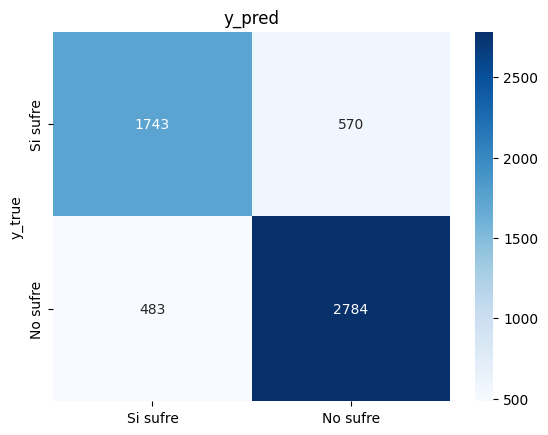

[[1743  570]
 [ 483 2784]]


In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
#Matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Si sufre','No sufre'], yticklabels=['Si sufre','No sufre'],fmt='g')
plt.ylabel('y_true')
plt.title('y_pred')
plt.show()

print(cm)

In [ ]:
#Importar la libreria
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score
target_names = ["Si sufre", "No sufre"]
print(classification_report(y_test, y_pred_test, target_names=target_names))
print("G-mean = ", geometric_mean_score(y_test, y_pred_test))

              precision    recall  f1-score   support

    Si sufre       0.78      0.75      0.77      2313
    No sufre       0.83      0.85      0.84      3267

    accuracy                           0.81      5580
   macro avg       0.81      0.80      0.80      5580
weighted avg       0.81      0.81      0.81      5580

G-mean =  0.8013475720041023


Con un G-mean del 80.13%, se puede decir que se explica lo suficiente de la variable dependiente. Sin embargo, al ser un modelo con overfitting aún puede mejorar, probaremos optimizando este modelo.

No se puede generar el gráfico de la región de decisión ya que hay mas de 2 variables.

In [ ]:
#Forma 1
model4.predict([[1, 3, 7.65, 30, 2, 8], [1, 1, 9.65, 25, 2, 2], [0, 5, 5.65, 26, 4, 10]]) #0=no sufre, 1=si sufre

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 1])

In [ ]:
#Forma 2
x_new = pd.DataFrame({'Suicidal_thoughts': [1,0,1],
                     'Academic Pressure': [2,5,3],
                      'CGPA': [6.3,7.24,9.05],
                      'Age': [26,34,28],
                      'Financial Stress': [1,4,3],
                      'Work/Study Hours': [4,12,6]})
x_new

,Suicidal_thoughts,Academic Pressure,CGPA,Age,Financial Stress,Work/Study Hours
0,1,2,6.30,26,1,4
1,0,5,7.24,34,4,12
2,1,3,9.05,28,3,6


In [ ]:
y_pred_new = model4.predict(x_new)
y_pred_new #0=no sufre, 1=si sufre

array([0, 0, 1])

In [ ]:
#Calcular la probabilidad
y_pred_new_proba = model4.predict_proba(x_new)
y_pred_new_proba

array([[0.76      , 0.24      ],
       [0.7       , 0.3       ],
       [0.21333333, 0.78666667]])

**Modelo Optimizado**

In [ ]:
#Definir el rango de valores a utilizar

param_range = {'n_estimators': range(50,1050,50),
               'criterion': ['gini','entropy','log_loss'],
               'max_depth': range(1,16,1),
               'min_samples_split': range(2,16,1),
               'min_samples_leaf': range(1,16,1),
              'max_features': ['auto', 'sqrt', 'log2']}

#imprimamos los valores a optimizar
print(list(param_range['n_estimators']))
print(list(param_range['criterion']))
print(list(param_range['max_depth']))
print(list(param_range['min_samples_split']))
print(list(param_range['min_samples_leaf']))
print(list(param_range['max_features']))

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
['gini', 'entropy', 'log_loss']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
['auto', 'sqrt', 'log2']


In [ ]:
#Definir el g-mean como métrica genérica para optimizar el modelo
from sklearn.metrics import make_scorer
#Generamos al gmean como métrica genérica
g_mean_score = make_scorer(geometric_mean_score)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Definir el optimizador
csearch = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                             param_range,
                             cv=5, #Divide los datos en grupos de entrenamiento
                             n_jobs=-1, #Usar todos los procesadores del pc
                             verbose=3, #Ver los resultados detras del optimizador (como ver 3 resultados)
                             n_iter=20,
                            scoring=g_mean_score)
#Optimizamos el modelo
csearch.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", li

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 16),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 16),
                                        'min_samples_split': range(2, 16),
                                        'n_estimators': range(50, 1050, 50)},
                   scoring=make_scorer(geometric_mean_score, response_method='predict'),
                   verbose=3)

In [ ]:
#Veamos los resultados
print('Mean g_mean = ', csearch.best_score_)
print('Best Model = ', csearch.best_estimator_)
print('Best Params = ', csearch.best_params_)

Mean g_mean =  0.8283690656983247
Best Model =  RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=14, min_samples_split=3,
                       n_estimators=350, random_state=42)
Best Params =  {'n_estimators': 350, 'min_samples_split': 3, 'min_samples_leaf': 14, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}


In [ ]:
#Definimos el modelo óptimo
model5 = RandomForestClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=11,
                       n_estimators=800, random_state=42)
#Entrenar el modelo
model5.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=11,
                       n_estimators=800, random_state=42)

In [ ]:
#Validamos con los datos de test
y_pred_test5 = model5.predict(x_test)
print('y_pred_test = ', y_pred_test5[0:5])

#Comparamos cn los datos reales
print('y_test = \n', y_test.head())

y_pred_test =  [1 1 0 0 1]
y_test = 
 7017     0
7548     1
2051     0
4436     1
26281    1
Name: Depression_num, dtype: int64


In [ ]:
print('Accuracy_train = ', model5.score(x_train, y_train))
print('Accuracy_test = ', model5.score(x_test, y_test))
print('Diferencia = ', np.abs(model5.score(x_train, y_train) - model5.score(x_test, y_test))*100)

Accuracy_train =  0.8576933416972847
Accuracy_test =  0.8331541218637993
Diferencia =  2.4539219833485393


El modelo no tiene overfitting al ser menor al 10%, por lo que este modelo puede ser útil.

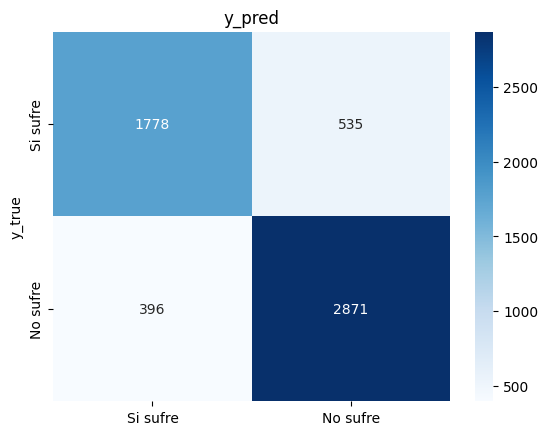

[[1778  535]
 [ 396 2871]]


In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test5)
#Matriz de confusión con seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Si sufre','No sufre'], yticklabels=['Si sufre','No sufre'],fmt='g')
plt.ylabel('y_true')
plt.title('y_pred')
plt.show()

print(cm)

El modelo sigue cometiendo errores, pero ya son menores.

In [ ]:
#Importar la librería
from sklearn.metrics import classification_report
from imblearn.metrics import geometric_mean_score

target_names = ['Si sufre', 'No sufre']
print(classification_report(y_test, y_pred_test5, target_names=target_names))
print('G-mean = ', geometric_mean_score(y_test, y_pred_test5))

              precision    recall  f1-score   support

    Si sufre       0.82      0.77      0.79      2313
    No sufre       0.84      0.88      0.86      3267

    accuracy                           0.83      5580
   macro avg       0.83      0.82      0.83      5580
weighted avg       0.83      0.83      0.83      5580

G-mean =  0.8219021016082895


Tiene una explicación de la vaiarble dependiente del 82.19%, lo que ya es suficiente para considerar que es un buen modelo.

No se puede generar el gráfico de la región de decisión ya que hay mas de 2 variables.

In [ ]:
x.head(10)

,Suicidal_thoughts,Academic Pressure,CGPA,Age,Financial Stress,Work/Study Hours
0,1,5.0,8.97,33.0,1.0,3.0
1,0,2.0,5.90,24.0,2.0,3.0
2,0,3.0,7.03,31.0,1.0,9.0
3,1,3.0,5.59,28.0,5.0,4.0
4,1,4.0,8.13,25.0,1.0,1.0
5,0,2.0,5.70,29.0,1.0,4.0
6,0,3.0,9.54,30.0,2.0,1.0
7,0,2.0,8.04,30.0,1.0,0.0
8,1,3.0,9.79,28.0,3.0,12.0
9,1,2.0,8.38,31.0,5.0,2.0


In [ ]:
#Forma 1
model5.predict([[1, 3, 7.65, 30, 2, 8], [1, 1, 9.65, 25, 2, 2], [0, 5, 5.65, 26, 4, 10]]) #0=no sufre, 1=si sufre

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1])

In [ ]:
#Forma 2
x_new = pd.DataFrame({'Suicidal_thoughts': [1,0,1],
                     'Academic Pressure': [2,5,3],
                      'CGPA': [6.3,7.24,9.05],
                      'Age': [26,34,28],
                      'Financial Stress': [1,4,3],
                      'Work/Study Hours': [4,12,6]})
x_new

,Suicidal_thoughts,Academic Pressure,CGPA,Age,Financial Stress,Work/Study Hours
0,1,2,6.30,26,1,4
1,0,5,7.24,34,4,12
2,1,3,9.05,28,3,6


In [ ]:
y_pred_new = model5.predict(x_new)
y_pred_new #0=no sufre, 1=si sufre

array([0, 0, 1])

In [ ]:
#Calcular la probabilidad
y_pred_new_proba = model5.predict_proba(x_new)
y_pred_new_proba

array([[0.6866132 , 0.3133868 ],
       [0.54623741, 0.45376259],
       [0.17976602, 0.82023398]])